In [1]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
import pandas as pd

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


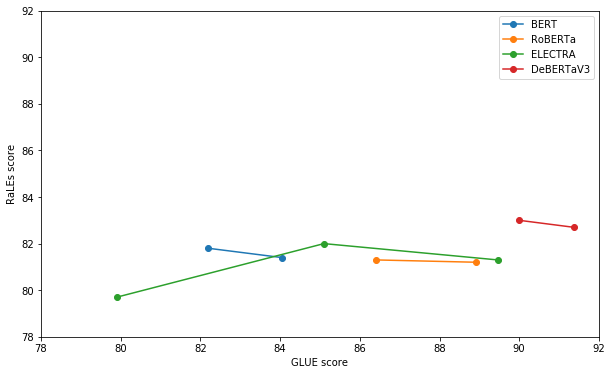

In [2]:
# GLUE score vs rales score

models = ['bert-base', 'bert-large', 'roberta-base', 'roberta-large', 'electra-small', 'electra-base', 'electra-large','deberta-v3-base', 'deberta-v3-large']
glue = {}
glue['bert_base'] = 82.2
glue['bert_large'] = 84.05
glue['roberta_base'] = 86.4
glue['roberta_large'] = 88.92
glue['electra_small'] = 79.9
glue['electra_base'] = 85.1
glue['electra_large'] = 89.46
glue['deberta_v3_base'] = 90.00
glue['deberta_v3_large'] = 91.37

rales = {}
rales['bert_base'] = 81.8
rales['bert_large'] = 81.4
rales['roberta_base'] = 81.3
rales['roberta_large'] = 81.2
rales['electra_small'] = 79.7
rales['electra_base'] = 82.0
rales['electra_large'] = 81.3
rales['deberta_v3_base'] = 83.0
rales['deberta_v3_large'] = 82.7

plt.figure(figsize=(10, 6))
plt.plot([v for k,v in glue.items() if 'bert_' in k], [v for k,v in rales.items() if 'bert_' in k], label='BERT', marker='o')
plt.plot([v for k,v in glue.items() if 'roberta_' in k], [v for k,v in rales.items() if 'roberta_' in k], label='RoBERTa', marker='o')
plt.plot([v for k,v in glue.items() if 'electra_' in k], [v for k,v in rales.items() if 'electra_' in k], label='ELECTRA', marker='o')
plt.plot([v for k,v in glue.items() if 'deberta_v3_' in k], [v for k,v in rales.items() if 'deberta_v3_' in k], label='DeBERTaV3', marker='o')
plt.xlabel('GLUE score')
plt.ylabel('RaLEs score')
plt.xlim(78, 92)
plt.ylim(78, 92)
plt.legend()
plt.show()

In [3]:
blurb = {}
blurb['bert_base'] = 76.11
blurb['bioclinicalbert'] = 77.29
blurb['pubmedbert'] = 81.50
blurb['biolinkbert_base'] = 83.39
blurb['biolinkbert_large'] = 84.30

rales['bioclinicalbert'] = 83.1
rales['pubmedbert'] = 81.9
rales['biolinkbert_base'] = 83.3
rales['biolinkbert_large'] = 82.6

rales['gatortron'] = 83.4
rales['radbert1'] = 82.7
rales['radbert2'] = 83.2

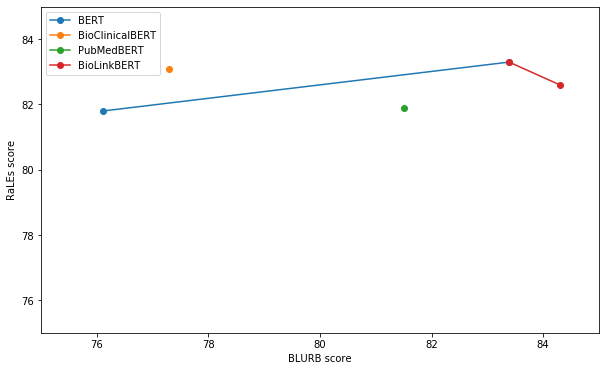

In [4]:
plt.figure(figsize=(10, 6))
plt.plot([v for k,v in blurb.items() if 'bert_base' in k], [v for k,v in rales.items() if 'bert_base' in k], label='BERT', marker='o')
plt.plot([v for k,v in blurb.items() if 'bioclinicalbert' in k], [v for k,v in rales.items() if 'bioclinicalbert' in k], label='BioClinicalBERT', marker='o')
plt.plot([v for k,v in blurb.items() if 'pubmedbert' in k], [v for k,v in rales.items() if 'pubmedbert' in k], label='PubMedBERT', marker='o')
plt.plot([v for k,v in blurb.items() if 'biolinkbert' in k], [v for k,v in rales.items() if 'biolinkbert' in k], label='BioLinkBERT', marker='o')
plt.xlabel('BLURB score')
plt.ylabel('RaLEs score')
plt.xlim(75, 85)
plt.ylim(75, 85)
plt.legend()
plt.show()

In [13]:
model_size = {}
model_size['bert_base'] = 110
model_size['bert_large'] = 340
model_size['roberta_base'] = 125
model_size['roberta_large'] = 355
model_size['electra_small'] = 14
model_size['electra_base'] = 110
model_size['electra_large'] = 345
model_size['deberta_v3_base'] = 86
model_size['deberta_v3_large'] = 304
model_size['pubmedbert'] = 110
model_size['biolinkbert_base'] = 110
model_size['biolinkbert_large'] = 340
model_size['bioclinicalbert'] = 110
model_size['gatortron'] = 345
model_size['radbert1']=110
model_size['radbert2']=125


In [14]:
# plt.plot([v for k,v in model_size.items() if k.startswith('bert_')], [v for k,v in rales.items() if k.startswith('bert_')], label='BERT', marker='o')

def get_domain(model_name):
    if model_name.startswith('bert_') or model_name.startswith('roberta_') or model_name.startswith('electra_') or model_name.startswith('deberta_'):
        return 'General'
    elif model_name.startswith('pubmedbert') or model_name.startswith('biolinkbert'):
        return 'Biomedical'
    elif model_name.startswith('bioclinicalbert') or model_name.startswith('gator'):
        return 'Clinical'
    elif model_name.startswith('radbert'):
        return 'Radiology'
model_names = {'bert_base':'BERTbase', 'bert_large':'BERTlarge', 'roberta_base':'RoBERTabase', 'roberta_large':'RoBERTalarge', 
                'electra_small':'ELECTRAsmall', 'electra_base':'ELECTRAbase', 'electra_large':'ELECTRAlarge', 
                'deberta_v3_base':'DeBERTaV3base', 'deberta_v3_large':'DeBERTaV3large', 
                'pubmedbert':'PubMedBERT', 'biolinkbert_base':'BioLinkBERTbase', 'biolinkbert_large':'BioLinkBERTlarge', 
                'bioclinicalbert':'BioClinicalBERT', 'gatortron':'GatorTron', 'radbert1':'RadBERT1', 'radbert2':'RadBERT2'}
results_df = pd.DataFrame({'model': [k for k in rales.keys()], 'rales': [rales[k] for k in rales.keys()], 'model_size': [model_size[k] for k in rales.keys()], \
                           'model_name': [model_names[k] for k in rales.keys()]})
results_df['domain'] = results_df['model'].apply(get_domain)



In [15]:
import seaborn as sns
sns.set_theme(style="white")

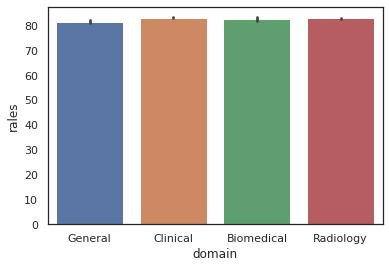

In [16]:
sns.barplot(x="domain", y="rales", data=results_df)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


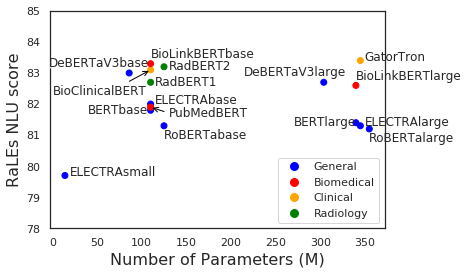

In [35]:
# plt.figure(figsize=(8,6))
# sns.scatterplot(y="rales", x="model_size", hue='domain', data=results_df)
from matplotlib.lines import Line2D

plt.scatter(results_df['model_size'], results_df['rales'], c=results_df['domain'].map({'General': 'blue', 'Biomedical': 'red', 'Clinical': 'orange', 'Radiology': 'green'}))
plt.ylim(78, 85)
plt.xlabel('Number of Parameters (M)', fontsize=16)
plt.ylabel('RaLEs NLU score', fontsize=16)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='General', markerfacecolor='blue', markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='Biomedical', markerfacecolor='red', markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='Clinical', markerfacecolor='orange', markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='Radiology', markerfacecolor='green', markersize=10)]
plt.legend(handles=legend_elements, loc='lower right')#, title="Domain")
label_fsize=12
for i,x in results_df.iterrows():
    if x.model.startswith('bert_'):
         plt.annotate(x.model_name, xy=(x.model_size-70, x.rales-.1), xycoords='data',\
                        xytext=(x.model_size-70, x.rales-.1), textcoords='data',\
                        fontsize=label_fsize, rotation=0, arrowprops=dict(arrowstyle="->", connectionstyle="arc3", relpos=(0.0,0.0)))
    elif 'deberta' in x.model:
        plt.annotate(x.model_name, xy=(x.model_size-80, x.rales+.5), xycoords='data',\
                        xytext=(x.model_size-90, x.rales+.2), textcoords='data',\
                        fontsize=label_fsize, rotation=0, arrowprops=dict(arrowstyle="->", connectionstyle="arc3", relpos=(0.0,0.0)))
    elif 'roberta' in x.model:
        plt.annotate(x.model_name, xy=(x.model_size, x.rales-.4), xycoords='data',\
                        xytext=(x.model_size, x.rales-.4), textcoords='data',\
                        fontsize=label_fsize, rotation=0, arrowprops=dict(arrowstyle="->", connectionstyle="arc3", relpos=(0.0,0.0)))
    # elif 'gatortron' in x.model:
    #     plt.annotate(x.model_name, xy=(x.model_size, x.rales), xycoords='data',\
    #                     xytext=(x.model_size-30, x.rales+.3), textcoords='data',\
    #                     fontsize=label_fsize, rotation=0, arrowprops=dict(arrowstyle="->", color='black', relpos=(.5,0.5)))
    elif 'biolinkbert' in x.model:
        plt.annotate(x.model_name, xy=(x.model_size, x.rales), xycoords='data',\
                        xytext=(x.model_size, x.rales+.2), textcoords='data',\
                        fontsize=label_fsize, rotation=0)
    elif 'pubmedbert' in x.model:
        plt.annotate(x.model_name, xy=(x.model_size, x.rales), xycoords='data',\
                        xytext=(x.model_size+20, x.rales-.3), textcoords='data',\
                        fontsize=label_fsize, rotation=0, arrowprops=dict(arrowstyle="->", color='black', relpos=(0,.5)))
    elif 'bioclinicalbert' in x.model:
        plt.annotate(x.model_name, xy=(x.model_size, x.rales), xycoords='data',\
                        xytext=(x.model_size-110, x.rales-.8), textcoords='data',\
                        fontsize=label_fsize, rotation=0, arrowprops=dict(arrowstyle="->", color='black', relpos=(0.7,0.8)))
    elif 'radbert' in x.model:
        plt.annotate(x.model_name, xy=(x.model_size, x.rales), xycoords='data',\
                        xytext=(x.model_size+5, x.rales+-.1), textcoords='data',\
                        fontsize=label_fsize, rotation=0)
    else:
        plt.annotate(x.model_name, xy=(x.model_size, x.rales), xycoords='data',\
                            xytext=(x.model_size+5, x.rales), textcoords='data',\
                            fontsize=label_fsize, rotation=0)

In [18]:
results_df.sort_values('rales', ascending=False)

,model,rales,model_size,model_name,domain
13,gatortron,83.4,345,GatorTron,Clinical
11,biolinkbert_base,83.3,110,BioLinkBERTbase,Biomedical
15,radbert2,83.2,125,RadBERT2,Radiology
9,bioclinicalbert,83.1,110,BioClinicalBERT,Clinical
7,deberta_v3_base,83.0,86,DeBERTaV3base,General
8,deberta_v3_large,82.7,304,DeBERTaV3large,General
14,radbert1,82.7,110,RadBERT1,Radiology
12,biolinkbert_large,82.6,340,BioLinkBERTlarge,Biomedical
5,electra_base,82.0,110,ELECTRAbase,General
10,pubmedbert,81.9,110,PubMedBERT,Biomedical
